In [1]:
# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import ConvLSTM2D, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [2]:
# tensorflow version
tf.__version__

'2.4.1'

In [3]:
fn = '/home/jefire/project/water/input/niamey_gpm_data_2001_2020.csv'

In [4]:
df = pd.read_csv(fn)
df

,date,Pt-130,Rt-220,Tt-1,Tt-141,Tavgt-14,Q
0,1/6/2001,12.527404,1118.043262,23.324537,27.391293,24.053760,1859.62
1,1/7/2001,8.157645,1115.194639,23.059826,26.167612,24.060747,1859.62
2,1/8/2001,10.492196,1114.592118,23.530050,27.115423,24.056043,1859.62
3,1/9/2001,1.786269,1102.826021,23.619896,28.531956,23.996257,1859.62
4,1/10/2001,0.872670,1090.040471,23.558064,28.833944,23.941651,1859.62
...,...,...,...,...,...,...,...
7096,6/11/2020,0.000880,211.958244,30.802840,26.469141,32.474561,55.10
7097,6/12/2020,0.000388,214.029747,32.441933,26.958002,32.483956,55.10
7098,6/13/2020,0.000030,218.132397,33.119534,26.481450,32.476045,56.45
7099,6/14/2020,0.000017,230.722169,32.874195,26.987434,32.454815,167.03


In [5]:
# make a copy of the Dataframe
df_copy = df.copy()
df_copy

,date,Pt-130,Rt-220,Tt-1,Tt-141,Tavgt-14,Q
0,1/6/2001,12.527404,1118.043262,23.324537,27.391293,24.053760,1859.62
1,1/7/2001,8.157645,1115.194639,23.059826,26.167612,24.060747,1859.62
2,1/8/2001,10.492196,1114.592118,23.530050,27.115423,24.056043,1859.62
3,1/9/2001,1.786269,1102.826021,23.619896,28.531956,23.996257,1859.62
4,1/10/2001,0.872670,1090.040471,23.558064,28.833944,23.941651,1859.62
...,...,...,...,...,...,...,...
7096,6/11/2020,0.000880,211.958244,30.802840,26.469141,32.474561,55.10
7097,6/12/2020,0.000388,214.029747,32.441933,26.958002,32.483956,55.10
7098,6/13/2020,0.000030,218.132397,33.119534,26.481450,32.476045,56.45
7099,6/14/2020,0.000017,230.722169,32.874195,26.987434,32.454815,167.03


In [6]:
# convert to datetime object
df_copy.date = pd.to_datetime(df_copy.date, dayfirst = False)
df_copy

,date,Pt-130,Rt-220,Tt-1,Tt-141,Tavgt-14,Q
0,2001-01-06,12.527404,1118.043262,23.324537,27.391293,24.053760,1859.62
1,2001-01-07,8.157645,1115.194639,23.059826,26.167612,24.060747,1859.62
2,2001-01-08,10.492196,1114.592118,23.530050,27.115423,24.056043,1859.62
3,2001-01-09,1.786269,1102.826021,23.619896,28.531956,23.996257,1859.62
4,2001-01-10,0.872670,1090.040471,23.558064,28.833944,23.941651,1859.62
...,...,...,...,...,...,...,...
7096,2020-06-11,0.000880,211.958244,30.802840,26.469141,32.474561,55.10
7097,2020-06-12,0.000388,214.029747,32.441933,26.958002,32.483956,55.10
7098,2020-06-13,0.000030,218.132397,33.119534,26.481450,32.476045,56.45
7099,2020-06-14,0.000017,230.722169,32.874195,26.987434,32.454815,167.03


In [7]:
# get summary statistics
df_copy.describe()

,Pt-130,Rt-220,Tt-1,Tt-141,Tavgt-14,Q
count,7101.000000,7101.000000,7101.000000,7101.000000,7101.000000,7101.000000
mean,3.723379,820.862144,28.901515,28.826117,28.895460,944.094060
std,5.749542,437.347298,3.213747,3.198300,3.035682,659.307962
min,0.000000,89.347297,18.093447,18.093447,20.373102,12.180000
25%,0.037339,380.189194,27.041864,26.987906,27.203284,222.600000
50%,0.899608,887.606406,29.226387,29.139395,29.169763,1050.400000
75%,5.231491,1219.299519,31.271360,31.134483,31.319446,1513.770000
max,47.122757,1538.800516,35.709473,35.709473,34.694640,2677.000000


In [8]:
# get datetime statistics
df_copy.date.describe()

<ipython-input-8-230b203a077f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_copy.date.describe()


count                    7101
unique                   7101
top       2001-01-06 00:00:00
freq                        1
first     2001-01-06 00:00:00
last      2020-06-15 00:00:00
Name: date, dtype: object

In [9]:
# Define a function to prepare multivariate data
# so that it is suitable for a time series.
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon
    for i in range(start, end):
        indicex = range(i-window, i)
        X.append(dataset[indicex])
        indicey = range(i-1, i-1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [10]:
# set date as index
df_copy.set_index("date", inplace=True)
df_copy

,Pt-130,Rt-220,Tt-1,Tt-141,Tavgt-14,Q
date,,,,,,
2001-01-06,12.527404,1118.043262,23.324537,27.391293,24.053760,1859.62
2001-01-07,8.157645,1115.194639,23.059826,26.167612,24.060747,1859.62
2001-01-08,10.492196,1114.592118,23.530050,27.115423,24.056043,1859.62
2001-01-09,1.786269,1102.826021,23.619896,28.531956,23.996257,1859.62
2001-01-10,0.872670,1090.040471,23.558064,28.833944,23.941651,1859.62
...,...,...,...,...,...,...
2020-06-11,0.000880,211.958244,30.802840,26.469141,32.474561,55.10
2020-06-12,0.000388,214.029747,32.441933,26.958002,32.483956,55.10
2020-06-13,0.000030,218.132397,33.119534,26.481450,32.476045,56.45


In [11]:
# ERA5
# hold back the last two years (639 days) data to be used for testing the model
df_test = df_copy[['Pt-130', 'Rt-220', 'Tt-1', 'Tt-141', 'Tavgt-14',
'Q']].loc['2018-01-01':'2020-06-15']
df_copy.drop(df_copy.loc['2018-01-01':'2020-06-15'].index,inplace=True) # 639 days
df_copy

,Pt-130,Rt-220,Tt-1,Tt-141,Tavgt-14,Q
date,,,,,,
2001-01-06,12.527404,1118.043262,23.324537,27.391293,24.053760,1859.62
2001-01-07,8.157645,1115.194639,23.059826,26.167612,24.060747,1859.62
2001-01-08,10.492196,1114.592118,23.530050,27.115423,24.056043,1859.62
2001-01-09,1.786269,1102.826021,23.619896,28.531956,23.996257,1859.62
2001-01-10,0.872670,1090.040471,23.558064,28.833944,23.941651,1859.62
...,...,...,...,...,...,...
2017-12-27,2.905070,1177.988175,23.533382,27.155117,23.275464,1421.60
2017-12-28,7.816599,1175.334005,23.921818,27.261726,23.058629,1414.40
2017-12-29,20.666925,1171.102294,22.992575,27.997816,22.840844,1407.20


In [12]:
# confirm the drop
df_copy.describe()

,Pt-130,Rt-220,Tt-1,Tt-141,Tavgt-14,Q
count,6204.000000,6204.000000,6204.000000,6204.000000,6204.000000,6204.000000
mean,3.750881,825.214054,28.866687,28.854137,28.868391,937.419456
std,5.753383,434.872743,3.187234,3.186866,3.002583,641.331221
min,0.000000,109.262817,18.093447,18.093447,20.373102,12.180000
25%,0.041538,392.178731,27.085790,27.078392,27.254545,232.200000
50%,0.948431,894.872639,29.186428,29.143386,29.121498,1056.300000
75%,5.287211,1216.897316,31.172635,31.171540,31.178189,1500.570000
max,47.122757,1538.800516,35.688965,35.688965,34.694640,2482.000000


In [13]:
# Display Pipeline
set_config(display='diagram')

In [15]:
#1st Quantile Transformer
trf1 = ColumnTransformer([
        ('quantile',QuantileTransformer(output_distribution='normal'),slice(0,4))
    ],remainder='passthrough')

#2nd Standar Scaling
trf2 = ColumnTransformer([
    ('scaler', StandardScaler(),slice(0,4))
    ],remainder='passthrough')

In [16]:
#1st Quantile Transformer
trf1 = ColumnTransformer([
        ('quantile',QuantileTransformer(output_distribution='normal'),slice(0,4))
    ],remainder='passthrough')

#2nd Standar Scaling
trf2 = ColumnTransformer([
    ('scaler', StandardScaler(),slice(0,4))
    ],remainder='passthrough')

In [17]:
pipe = Pipeline([('trf1', trf1),('trf2', trf2)])

In [18]:
#fit data
pipe.fit(df_copy[['Pt-130', 'Rt-220', 'Tt-1', 'Tt-141', 'Tavgt-14']])

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('quantile',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  slice(0, 4, None))])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 4, None))]))])

In [19]:
# apply transform to train dataset
dataX = pipe.transform(df_copy[['Pt-130', 'Rt-220', 'Tt-1', 'Tt-141', 'Tavgt-14']])
print(dataX[0])
dataX.shape

[ 1.32020477  0.38209134 -1.51674236 -0.57736638 24.05375979]


(6204, 5)

In [20]:
scaler = StandardScaler()
scaler.fit(df_copy[['Q']])

StandardScaler()

In [21]:
# Let’s standardize data
dataY = scaler.transform(df_copy[['Q']])
dataY[0]

array([1.43806327])

In [22]:
print(len(df_copy.loc['2015-01-01':'2017-12-31']))

1096


In [23]:
# let’s allow the model to see / train on the past 90 days of data 
# and try to forecast the next 1 day of results. Hence, use horizon = 1
# This is called Single step Forecast
hist_window = 30 # 90
horizon = 1
TRAIN_SPLIT = 5077 # 2891 #2809 # 2326
x_train_multi, y_train_multi = custom_ts_multi_data_prep(
    dataX, dataY, 0, TRAIN_SPLIT, hist_window, horizon)
x_val_multi, y_val_multi= custom_ts_multi_data_prep(
    dataX, dataY, TRAIN_SPLIT, None, hist_window, horizon)
print ('Single window of past history')
print(x_train_multi[0])
print ('\n Target horizon')
print (y_train_multi[0])
print(len(x_train_multi))
print(x_train_multi.shape)
print(x_val_multi.shape)

Single window of past history
[[ 1.32020477e+00  3.82091344e-01 -1.51674236e+00 -5.77366382e-01
   2.40537598e+01]
 [ 9.44545053e-01  3.70261600e-01 -1.57463148e+00 -8.55664572e-01
   2.40607469e+01]
 [ 1.14951052e+00  3.68312051e-01 -1.45802954e+00 -6.62807358e-01
   2.40560433e+01]
 [ 1.98168739e-01  3.42170156e-01 -1.43424311e+00 -2.03440887e-01
   2.39962565e+01]
 [-1.64152951e-02  3.10593011e-01 -1.45000779e+00 -9.59908830e-02
   2.39416509e+01]
 [ 3.55858140e-01  3.01293887e-01 -1.37984231e+00 -2.45566286e-01
   2.38918322e+01]
 [ 8.84379363e-01  2.79790845e-01 -1.36168525e+00 -3.59740135e-01
   2.38598401e+01]
 [ 8.88393230e-01  2.73608828e-01 -1.35672706e+00 -2.31092847e-01
   2.38444406e+01]
 [ 6.22100235e-01  2.58429661e-01 -1.32696620e+00 -1.06697005e-01
   2.38012558e+01]
 [ 7.26156571e-01  2.56073616e-01 -1.48190325e+00 -9.11868698e-02
   2.37171654e+01]
 [ 1.07915393e+00  2.51790117e-01 -1.58335303e+00  1.31429316e-01
   2.36955429e+01]
 [ 1.33677195e+00  2.29573135e-01 -

In [24]:
# reshape input feature for ConvLSTM 
x_train_multi_ConvLSTM = x_train_multi.reshape((x_train_multi.shape[0], 2, 1,
x_train_multi.shape[1]//2, x_train_multi.shape[2]))
print(x_train_multi_ConvLSTM.shape)

x_val_multi_ConvLSTM = x_val_multi.reshape((x_val_multi.shape[0], 2, 1,
x_val_multi.shape[1]//2, x_val_multi.shape[2]))
print(x_val_multi_ConvLSTM.shape)

(5047, 2, 1, 15, 5)
(1096, 2, 1, 15, 5)


In [25]:
# Prepare CovLSTM2D training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi_ConvLSTM, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi_ConvLSTM, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [26]:
# Define the ConvLSTM model

ConvLSTM_model = Sequential()
ConvLSTM_model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='tanh', 
input_shape=(2, 1, x_train_multi_ConvLSTM.shape[3], x_train_multi_ConvLSTM.shape[4])))
ConvLSTM_model.add(Dropout(0.2))
ConvLSTM_model.add(Flatten())
ConvLSTM_model.add(Dense(30, activation='relu'))
ConvLSTM_model.add(Dropout(0.2))
ConvLSTM_model.add(Dense(horizon))
ConvLSTM_model.compile(optimizer='adam', loss='mse')

In [28]:
model_path = r'/home/jefire/project/water/models/niamey_models/ConvLSTM_Multi_Niamey_Q_1step_30days_gpm_tanh.h5'

In [29]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 100
EPOCHS = 150
history = ConvLSTM_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/150
100/100 [==============================] - 14s 37ms/step - loss: 0.5699 - val_loss: 0.2452
Epoch 2/150
100/100 [==============================] - 2s 15ms/step - loss: 0.2662 - val_loss: 0.2933
Epoch 3/150
100/100 [==============================] - 2s 15ms/step - loss: 0.2581 - val_loss: 0.1829
Epoch 4/150
100/100 [==============================] - 2s 15ms/step - loss: 0.2077 - val_loss: 0.1768
Epoch 5/150
100/100 [==============================] - 2s 15ms/step - loss: 0.1927 - val_loss: 0.1696
Epoch 6/150
100/100 [==============================] - 2s 15ms/step - loss: 0.1795 - val_loss: 0.1671
Epoch 7/150
100/100 [==============================] - 2s 16ms/step - loss: 0.1690 - val_loss: 0.1623
Epoch 8/150
100/100 [==============================] - 2s 15ms/step - loss: 0.1612 - val_loss: 0.1522
Epoch 9/150
100/100 [==============================] - 2s 15ms/step - loss: 0.1599 - val_loss: 0.1461
Epoch 10/150
100/100 [==============================] - 2s 16ms/step - loss: 0.15

In [30]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

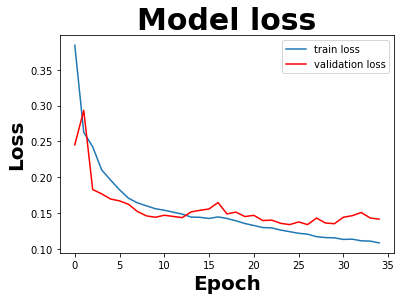

<Figure size 1152x648 with 0 Axes>

In [31]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=30,fontweight='bold')
plt.ylabel('Loss',size=20,fontweight='semibold')
plt.xlabel('Epoch',size=20,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [32]:
# Check the model summary
Trained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 1, 13, 64)         53248     
_________________________________________________________________
dropout (Dropout)            (None, 1, 13, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 832)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                24990     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 78,269
Trainable params: 78,269
Non-trainable params: 0
____________________________________________________

In [33]:
# apply transform to test dataset
validateX = pipe.transform(df_test[['Pt-130', 'Rt-220', 'Tt-1', 'Tt-141', 'Tavgt-14']])

validateX[0]

array([ 1.28949592,  0.46307769, -1.55830143,  0.14165996, 22.29016971])

In [34]:
# Let’s standardize data
validateY = scaler.transform(df_test[['Q']])
validateY[0]

array([0.63526204])

In [35]:
# Prepare test dataset
x_test_multi, y_test_multi = custom_ts_multi_data_prep(
    validateX, validateY, 0, None, hist_window, horizon)
print ('Single window of past history')
print(x_test_multi[0])
print ('\n Target horizon')
print (y_test_multi[0])
print(x_test_multi.shape)

Single window of past history
[[ 1.28949592e+00  4.63077694e-01 -1.55830143e+00  1.41659962e-01
   2.22901697e+01]
 [ 1.00063353e+00  4.27493330e-01 -1.56327209e+00  2.80809548e-01
   2.22058169e+01]
 [ 1.94620176e+00  4.24695039e-01 -1.57077380e+00 -8.80828358e-02
   2.22165577e+01]
 [ 3.91486023e-01  4.21909932e-01 -1.57220782e+00  3.48338472e-01
   2.23773927e+01]
 [-1.60701927e-01  4.02393149e-01 -1.59191404e+00  6.47787032e-01
   2.25827177e+01]
 [ 4.06523610e-02  3.96090593e-01 -1.71906700e+00 -4.63530967e-02
   2.27861317e+01]
 [ 2.08418870e+00  3.92226707e-01 -1.74725671e+00 -2.42473338e-01
   2.30041139e+01]
 [ 1.94737708e+00  3.72219564e-01 -1.51275425e+00  4.58934399e-02
   2.31805411e+01]
 [ 1.37495349e+00  3.63498256e-01 -1.20705898e+00 -5.25777786e-01
   2.32178660e+01]
 [ 7.67478115e-01  3.62451113e-01 -1.31848997e+00 -7.55626414e-01
   2.32208240e+01]
 [ 1.04083442e+00  3.55828814e-01 -1.33915126e+00 -8.17794669e-01
   2.32504681e+01]
 [ 1.40515787e+00  3.25609481e-01 -

In [36]:
# reshape for ConvLSTM2D
x_test_multi_ConvLSTM = x_test_multi.reshape((x_test_multi.shape[0], 2, 1,
x_test_multi.shape[1]//2, x_test_multi.shape[2]))
print(x_test_multi_ConvLSTM.shape)

(866, 2, 1, 15, 5)


In [37]:
# predictions for ConvLSTM2D

predictions = []
for i in x_test_multi_ConvLSTM:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1], i.shape[2], i.shape[3])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.5013324]]


In [38]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(866, 1)


In [39]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[1258.9137]
(866, 1)


In [41]:
# hold back 3 years data from test DataFrame to be used for testing the model
# validate DataFrame
validate = df_test[['Pt-130', 'Rt-220', 'Tt-1', 'Tt-141', 'Tavgt-14', 'Q']]

In [42]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(866).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.83657335]
KGE' is : [0.8200129]
r is : [0.95143485], gamma is : [0.96196896]
KGE is : [0.73312085]
alpha is : [0.79931247], beta is : [0.83091297]
PBIAS is : [16.90870282]
RMSE is : 316.7066863332662
MARE is : [0.23403542]
MSE is : 100303.12516819788
MAE is : 231.33334045045783
MAPE is : 41.62256371133365
R2 is : 0.8365733488303307



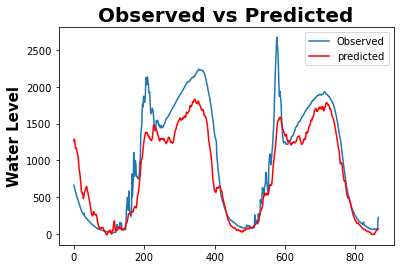

<Figure size 1152x648 with 0 Axes>

In [43]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q'].tail(866)))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Observed vs Predicted",size=20,fontweight='bold')
plt.ylabel("Water Level",size=15,fontweight='semibold')
plt.legend(('Observed','predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [44]:
plt.style.use('seaborn')
#plt.rcParams['figure.figsize'] = (16, 9)

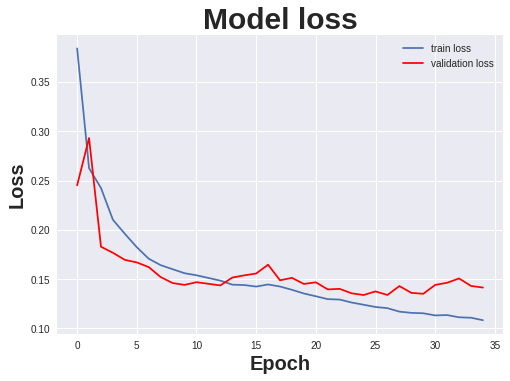

<Figure size 1152x648 with 0 Axes>

In [45]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=30,fontweight='bold')
plt.ylabel('Loss',size=20,fontweight='semibold')
plt.xlabel('Epoch',size=20,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

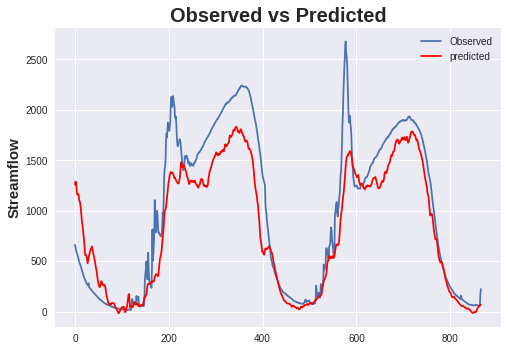

<Figure size 1152x648 with 0 Axes>

In [46]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q'].tail(866)))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Observed vs Predicted",size=20,fontweight='bold')
plt.ylabel("Streamflow",size=15,fontweight='semibold')
plt.legend(('Observed','predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [47]:
plt.style.use('seaborn-whitegrid')
#plt.rcParams['figure.figsize'] = (16, 9)

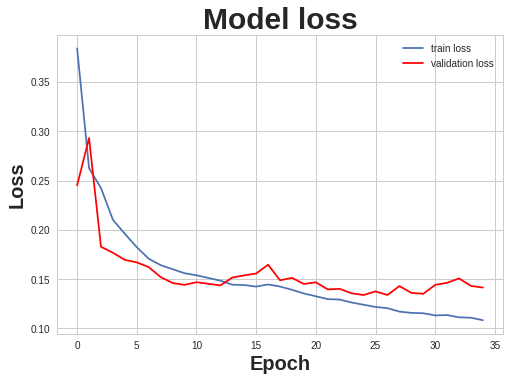

<Figure size 1152x648 with 0 Axes>

In [48]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=30,fontweight='bold')
plt.ylabel('Loss',size=20,fontweight='semibold')
plt.xlabel('Epoch',size=20,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [49]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/niamey_models/ConvLSTM_Multi_Niamey_Q_1step_30days_gpm_tanh.csv', index=False)

In [50]:
# Hybrid CNN LSTM

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten,TimeDistributed,RepeatVector
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [51]:
# reshape input feature for Hybrid CNN LSTM 
x_train_multi_CNN_LSTM = x_train_multi.reshape((x_train_multi.shape[0], 2, 
x_train_multi.shape[1]//2, x_train_multi.shape[2]))
print(x_train_multi_CNN_LSTM.shape)

x_val_multi_CNN_LSTM = x_val_multi.reshape((x_val_multi.shape[0], 2, 
x_val_multi.shape[1]//2, x_val_multi.shape[2]))
print(x_val_multi_CNN_LSTM.shape)

(5047, 2, 15, 5)
(1096, 2, 15, 5)


In [52]:
# Prepare  CNN LSTM training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi_CNN_LSTM, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi_CNN_LSTM, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [53]:
# Define the CNN LSTM model

CNN_LSTM_model = Sequential()
CNN_LSTM_model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(None, x_train_multi_CNN_LSTM.shape[2], x_train_multi_CNN_LSTM.shape[3]))))
CNN_LSTM_model.add(TimeDistributed(MaxPool1D(pool_size=2)))
CNN_LSTM_model.add(TimeDistributed(Dropout(0.2)))
CNN_LSTM_model.add(TimeDistributed(Flatten()))
CNN_LSTM_model.add(LSTM(units=100,activation='tanh'))
CNN_LSTM_model.add(Dropout(0.2))
CNN_LSTM_model.add(Dense(horizon))
CNN_LSTM_model.compile(optimizer='adam', loss='mse')

In [54]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/niamey_models/CNN_LSTM_Multi_Niamey_H_1step_30days_gpm_tanh.h5'

In [55]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 100
EPOCHS = 150
history = CNN_LSTM_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/150
100/100 [==============================] - 4s 19ms/step - loss: 0.6398 - val_loss: 0.3073
Epoch 2/150
100/100 [==============================] - 1s 6ms/step - loss: 0.2432 - val_loss: 0.1934
Epoch 3/150
100/100 [==============================] - 0s 5ms/step - loss: 0.1960 - val_loss: 0.1833
Epoch 4/150
100/100 [==============================] - 1s 5ms/step - loss: 0.1816 - val_loss: 0.1785
Epoch 5/150
100/100 [==============================] - 0s 5ms/step - loss: 0.1690 - val_loss: 0.1737
Epoch 6/150
100/100 [==============================] - 0s 5ms/step - loss: 0.1558 - val_loss: 0.1714
Epoch 7/150
100/100 [==============================] - 0s 5ms/step - loss: 0.1455 - val_loss: 0.1746
Epoch 8/150
100/100 [==============================] - 0s 5ms/step - loss: 0.1409 - val_loss: 0.1624
Epoch 9/150
100/100 [==============================] - 0s 5ms/step - loss: 0.1334 - val_loss: 0.1557
Epoch 10/150
100/100 [==============================] - 0s 5ms/step - loss: 0.1271 - val_l

In [56]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

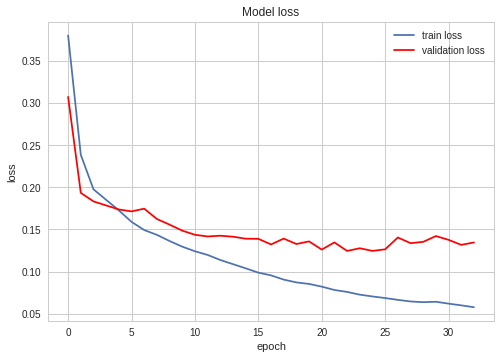

<Figure size 1152x648 with 0 Axes>

In [57]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [58]:
# Check the model summary
Trained_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 2, 13, 64)         1024      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 2, 6, 64)          0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 2, 6, 64)          0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 2, 384)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               194000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [59]:
# reshape for Hybrid CNN LSTM
x_test_multi_CNN_LSTM = x_test_multi.reshape((x_test_multi.shape[0], 2, 
x_test_multi.shape[1]//2, x_test_multi.shape[2]))
print(x_test_multi_CNN_LSTM.shape)
print(len(x_test_multi_CNN_LSTM))

(866, 2, 15, 5)
866


In [60]:
# predictions for hybrid CNN LSTM

predictions = []
for i in x_test_multi_CNN_LSTM:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1], i.shape[2])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.39909387]]


In [61]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(866, 1)


In [62]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[1193.3502]
(866, 1)


In [63]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(866).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.81356931]
KGE' is : [0.81391226]
r is : [0.93825366], gamma is : [0.93807923]
KGE is : [0.72169214]
alpha is : [0.78398889], beta is : [0.83573846]
PBIAS is : [16.42615405]
RMSE is : 338.2629990384164
MARE is : [0.23571194]
MSE is : 114421.85651846371
MAE is : 232.9904999001307
MAPE is : 37.39301715608035
R2 is : 0.8135693100282602



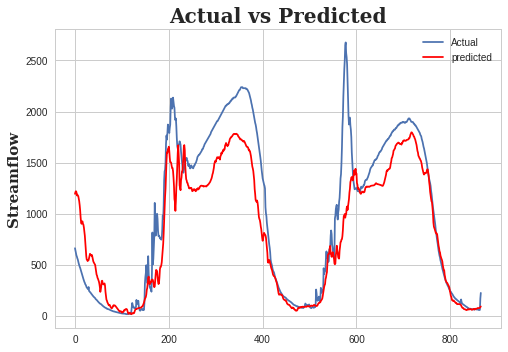

In [65]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q'].tail(866)))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted",size=20,fontweight='bold',family='serif')
plt.ylabel("Streamflow",size=15,fontweight='semibold',family='serif')
plt.legend(('Actual','predicted'))  # plt.legend(('Actual','predicted'), loc=' upper left ')
plt.show()

In [66]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/niamey_models/CNN_LSTM_Multi_Niamey_Q_1step_30days_gpm_tanh.csv', index=False)

In [67]:
# Hybrid CNN GRU

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten,TimeDistributed,RepeatVector
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [68]:
# reshape input feature for Hybrid CNN GRU 
x_train_multi_CNN_GRU = x_train_multi.reshape((x_train_multi.shape[0], 2, 
x_train_multi.shape[1]//2, x_train_multi.shape[2]))
print(x_train_multi_CNN_GRU.shape)

x_val_multi_CNN_GRU = x_val_multi.reshape((x_val_multi.shape[0], 2, 
x_val_multi.shape[1]//2, x_val_multi.shape[2]))
print(x_val_multi_CNN_GRU.shape)
print(len(x_val_multi_CNN_GRU))

(5047, 2, 15, 5)
(1096, 2, 15, 5)
1096


In [69]:
# Prepare  CNN GRU training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi_CNN_GRU, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi_CNN_GRU, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [70]:
# Define the CNN GRU model

CNN_GRU_model = Sequential()
CNN_GRU_model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(None, x_train_multi_CNN_GRU.shape[2], x_train_multi_CNN_GRU.shape[3]))))
CNN_GRU_model.add(TimeDistributed(MaxPool1D(pool_size=2)))
CNN_GRU_model.add(TimeDistributed(Dropout(0.2)))
CNN_GRU_model.add(TimeDistributed(Flatten()))
CNN_GRU_model.add(GRU(units=100,activation='tanh'))
CNN_GRU_model.add(Dropout(0.2))
CNN_GRU_model.add(Dense(horizon))
CNN_GRU_model.compile(optimizer='adam', loss='mse')

In [71]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/niamey_models/CNN_GRU_Multi_Niamey_Q_1step_30days_gpm_tanh.h5'

In [72]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 100
EPOCHS = 150
history = CNN_GRU_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/150
100/100 [==============================] - 3s 11ms/step - loss: 0.9714 - val_loss: 0.2357
Epoch 2/150
100/100 [==============================] - 1s 8ms/step - loss: 0.2826 - val_loss: 0.2801
Epoch 3/150
100/100 [==============================] - 1s 8ms/step - loss: 0.2600 - val_loss: 0.2016
Epoch 4/150
100/100 [==============================] - 1s 8ms/step - loss: 0.2234 - val_loss: 0.1898
Epoch 5/150
100/100 [==============================] - 1s 8ms/step - loss: 0.2054 - val_loss: 0.1745
Epoch 6/150
100/100 [==============================] - 1s 8ms/step - loss: 0.1873 - val_loss: 0.1661
Epoch 7/150
100/100 [==============================] - 1s 8ms/step - loss: 0.1731 - val_loss: 0.1581
Epoch 8/150
100/100 [==============================] - 1s 8ms/step - loss: 0.1583 - val_loss: 0.1557
Epoch 9/150
100/100 [==============================] - 1s 8ms/step - loss: 0.1501 - val_loss: 0.1497
Epoch 10/150
100/100 [==============================] - 1s 8ms/step - loss: 0.1426 - val_l

In [73]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

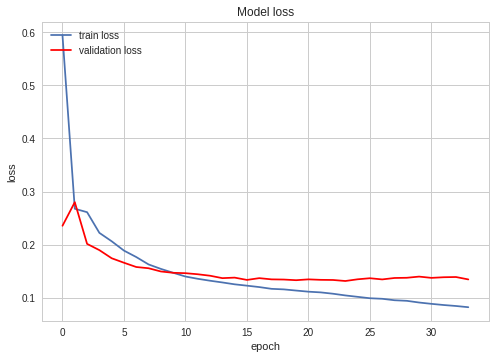

<Figure size 1152x648 with 0 Axes>

In [74]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.figure(figsize=(16,9))
plt.show()

In [75]:
# Check the model summary
Trained_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_4 (TimeDist (None, 2, 13, 64)         1024      
_________________________________________________________________
time_distributed_5 (TimeDist (None, 2, 6, 64)          0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 2, 6, 64)          0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 2, 384)            0         
_________________________________________________________________
gru (GRU)                    (None, 100)               145800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [76]:
# reshape for Hybrid CNN GRU
x_test_multi_CNN_GRU = x_test_multi.reshape((x_test_multi.shape[0], 2, 
x_test_multi.shape[1]//2, x_test_multi.shape[2]))
print(x_test_multi_CNN_GRU.shape)
print(len(x_test_multi_CNN_GRU))

(866, 2, 15, 5)
866


In [77]:
# predictions for hybrid CNN GRU

predictions = []
for i in x_test_multi_CNN_GRU:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1], i.shape[2])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.53950983]]


In [78]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(866, 1)


In [79]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[1283.3961]
(866, 1)


In [80]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(866).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.83241513]
KGE' is : [0.81847811]
r is : [0.94829458], gamma is : [0.9183693]
KGE is : [0.72449073]
alpha is : [0.77724737], beta is : [0.84633422]
PBIAS is : [15.36657823]
RMSE is : 320.7105111178623
MARE is : [0.23431536]
MSE is : 102855.23194148051
MAE is : 231.6100481998012
MAPE is : 43.30039995077937
R2 is : 0.8324151308018735



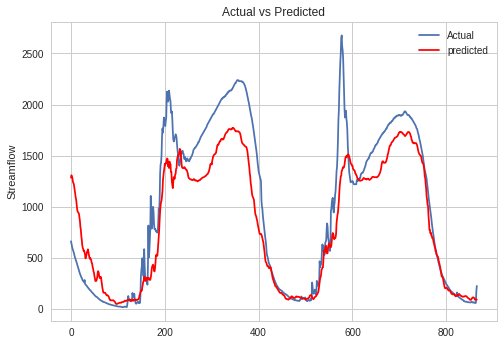

In [81]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q'].tail(866)))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()

In [82]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/niamey_models/CNN_GRU_Multi_Niamey_Q_1step_30days_gpm_tanh_history.csv', index=False)

In [83]:
# 4th Model
# Auto-encoder LSTM Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,TimeDistributed,RepeatVector
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [84]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [85]:
# Define the Auto-encoder LSTM model

# Define the auto-encoder LSTM model.
ED_lstm_model = Sequential([
    LSTM(40, input_shape=x_train_multi.shape[-2:], 
    return_sequences=True),
    LSTM(units=20,return_sequences=True),
    LSTM(units=15),
    RepeatVector(y_train_multi.shape[1]),
    LSTM(units=40,return_sequences=True),
    LSTM(units=25,return_sequences=True),
    TimeDistributed(tf.keras.layers.Dense(units=1))
])
ED_lstm_model.compile(optimizer='adam', loss='mse')

In [86]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/niamey_models/ED_LSTM_Multi_Niamey_Q_1step_30days_gpm_tanh.h5'

In [87]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 100
EPOCHS = 150
history = ED_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/150
100/100 [==============================] - 9s 31ms/step - loss: 0.8631 - val_loss: 0.2513
Epoch 2/150
100/100 [==============================] - 1s 14ms/step - loss: 0.2051 - val_loss: 0.2742
Epoch 3/150
100/100 [==============================] - 1s 14ms/step - loss: 0.1945 - val_loss: 0.1641
Epoch 4/150
100/100 [==============================] - 1s 14ms/step - loss: 0.1462 - val_loss: 0.1581
Epoch 5/150
100/100 [==============================] - 1s 14ms/step - loss: 0.1315 - val_loss: 0.1510
Epoch 6/150
100/100 [==============================] - 1s 14ms/step - loss: 0.1226 - val_loss: 0.1456
Epoch 7/150
100/100 [==============================] - 1s 14ms/step - loss: 0.1180 - val_loss: 0.1524
Epoch 8/150
100/100 [==============================] - 1s 14ms/step - loss: 0.1160 - val_loss: 0.1376
Epoch 9/150
100/100 [==============================] - 1s 14ms/step - loss: 0.1121 - val_loss: 0.1458
Epoch 10/150
100/100 [==============================] - 1s 14ms/step - loss: 0.110

In [88]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

In [90]:
# Check the model summary
Trained_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 40)            7360      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 20)            4880      
_________________________________________________________________
lstm_3 (LSTM)                (None, 15)                2160      
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 15)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 40)             8960      
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 25)             6600      
_________________________________________________________________
time_distributed_8 (TimeDist (None, 1, 1)             

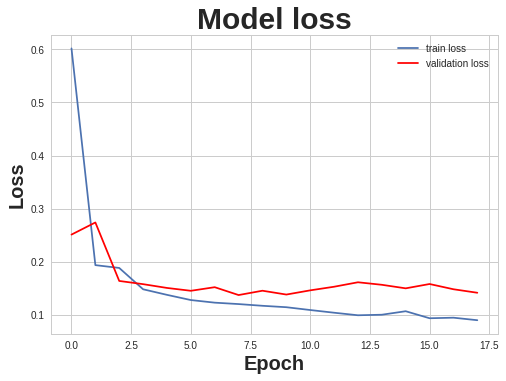

<Figure size 1152x648 with 0 Axes>

In [91]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=30,fontweight='bold')
plt.ylabel('Loss',size=20,fontweight='semibold')
plt.xlabel('Epoch',size=20,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [92]:
# Check the model summary
Trained_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 40)            7360      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 20)            4880      
_________________________________________________________________
lstm_3 (LSTM)                (None, 15)                2160      
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 15)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 40)             8960      
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 25)             6600      
_________________________________________________________________
time_distributed_8 (TimeDist (None, 1, 1)             

In [93]:
# predictions for AutoEncoder

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[[0.48458967]]]


In [94]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(866, 1)


In [95]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[1248.1769]
(866, 1)
866


In [96]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(866).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.83284829]
KGE' is : [0.82106012]
r is : [0.94830671], gamma is : [0.94523726]
KGE is : [0.73099114]
alpha is : [0.79180479], beta is : [0.83767833]
PBIAS is : [16.23216714]
RMSE is : 320.29577194384876
MARE is : [0.23005385]
MSE is : 102589.38152510599
MAE is : 227.3977381407141
MAPE is : 39.13965019108944
R2 is : 0.8328482882253065



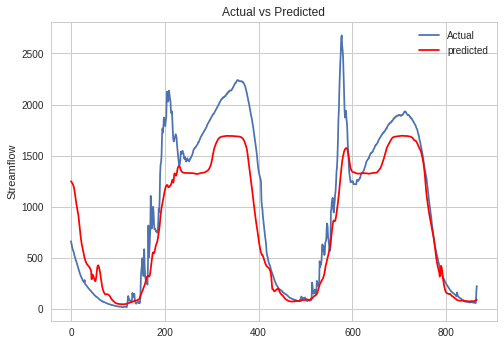

In [97]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q'].tail(866)))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()

In [98]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/niamey_models/ED_LSTM_Multi_Niamey_Q_1step_30days_gpm.csv', index=False)

In [99]:
# 5th Model
# CNN Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dropout
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [100]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [101]:
# Define the CNN model

CNN_model = Sequential()
CNN_model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(x_train_multi.shape[1], x_train_multi.shape[2])))
CNN_model.add(MaxPool1D(pool_size=2))
CNN_model.add(Dropout(0.2))
CNN_model.add(Flatten())
CNN_model.add(Dense(30, activation='relu'))
CNN_model.add(Dropout(0.2))
CNN_model.add(Dense(horizon))
CNN_model.compile(optimizer='adam', loss='mse')

In [102]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/niamey_models/CNN_Multi_Niamey_Q_1step_30days_gpm.h5'

In [103]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 100
EPOCHS = 150
history = CNN_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/150
100/100 [==============================] - 2s 13ms/step - loss: 4.5533 - val_loss: 0.2725
Epoch 2/150
100/100 [==============================] - 0s 4ms/step - loss: 0.3929 - val_loss: 0.2426
Epoch 3/150
100/100 [==============================] - 0s 4ms/step - loss: 0.3477 - val_loss: 0.2299
Epoch 4/150
100/100 [==============================] - 0s 4ms/step - loss: 0.3286 - val_loss: 0.2155
Epoch 5/150
100/100 [==============================] - 0s 3ms/step - loss: 0.3088 - val_loss: 0.2061
Epoch 6/150
100/100 [==============================] - 0s 3ms/step - loss: 0.3024 - val_loss: 0.1995
Epoch 7/150
100/100 [==============================] - 0s 3ms/step - loss: 0.2954 - val_loss: 0.1923
Epoch 8/150
100/100 [==============================] - 0s 3ms/step - loss: 0.2826 - val_loss: 0.1867
Epoch 9/150
100/100 [==============================] - 0s 4ms/step - loss: 0.2778 - val_loss: 0.1876
Epoch 10/150
100/100 [==============================] - 0s 3ms/step - loss: 0.2756 - val_l

In [104]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

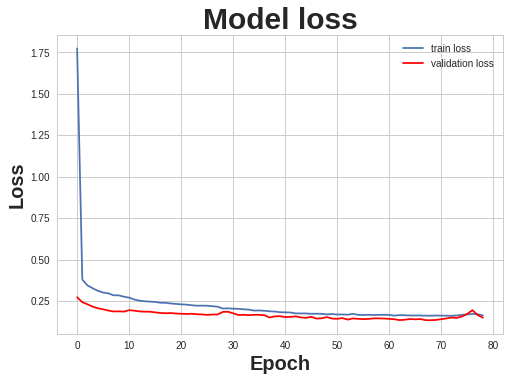

<Figure size 1152x648 with 0 Axes>

In [105]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=30,fontweight='bold')
plt.ylabel('Loss',size=20,fontweight='semibold')
plt.xlabel('Epoch',size=20,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [106]:
# Check the model summary
Trained_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 28, 64)            1024      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 14, 64)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 64)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 896)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 30)                26910     
_________________________________________________________________
dropout_7 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [107]:
# predictions for CNN

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.56030315]]


In [108]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(866, 1)


In [109]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[1296.7303]
(866, 1)
866


In [110]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(866).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.80222663]
KGE' is : [0.80311831]
r is : [0.93605578], gamma is : [0.91845397]
KGE is : [0.70423347]
alpha is : [0.7647019], beta is : [0.83259694]
PBIAS is : [16.74030573]
RMSE is : 348.4012441109508
MARE is : [0.27130172]
MSE is : 121383.42689805833
MAE is : 268.16937507212987
MAPE is : 110.34088229884631
R2 is : 0.8022266312023383



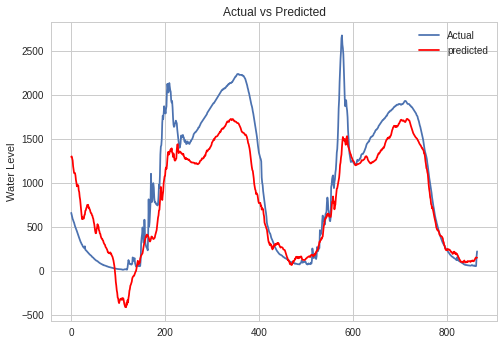

In [111]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q'].tail(866)))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Water Level")
plt.legend(('Actual','predicted'))
plt.show()

In [112]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/niamey_models/CNN_Multi_Niamey_Q_1step_30days_gpm_history.csv', index=False)

In [113]:
# 6th Model
# LSTM Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [114]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [115]:
# Define the LSTM model

lstm_multi = Sequential()
lstm_multi.add(LSTM(
    150,input_shape=x_train_multi.shape[-2:],return_sequences=True))
lstm_multi.add(Dropout(0.2)),
lstm_multi.add(LSTM(units=100,return_sequences=False)),
lstm_multi.add(Dropout(0.2)),
lstm_multi.add(Dense(units=horizon)),
lstm_multi.compile(optimizer='adam', loss='mse')

In [116]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/niamey_models/LSTM_Multi_Niamey_Q_1step_30days_gpm.h5'

In [117]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 100
EPOCHS = 150
history = lstm_multi.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/150
100/100 [==============================] - 5s 27ms/step - loss: 0.6038 - val_loss: 0.2026
Epoch 2/150
100/100 [==============================] - 2s 18ms/step - loss: 0.2127 - val_loss: 0.1977
Epoch 3/150
100/100 [==============================] - 2s 18ms/step - loss: 0.1820 - val_loss: 0.3013
Epoch 4/150
100/100 [==============================] - 2s 18ms/step - loss: 0.2204 - val_loss: 0.1820
Epoch 5/150
100/100 [==============================] - 2s 18ms/step - loss: 0.1660 - val_loss: 0.1835
Epoch 6/150
100/100 [==============================] - 2s 18ms/step - loss: 0.1509 - val_loss: 0.1812
Epoch 7/150
100/100 [==============================] - 2s 18ms/step - loss: 0.1477 - val_loss: 0.1731
Epoch 8/150
100/100 [==============================] - 2s 18ms/step - loss: 0.1356 - val_loss: 0.1666
Epoch 9/150
100/100 [==============================] - 2s 18ms/step - loss: 0.1308 - val_loss: 0.1722
Epoch 10/150
100/100 [==============================] - 2s 18ms/step - loss: 0.128

In [118]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

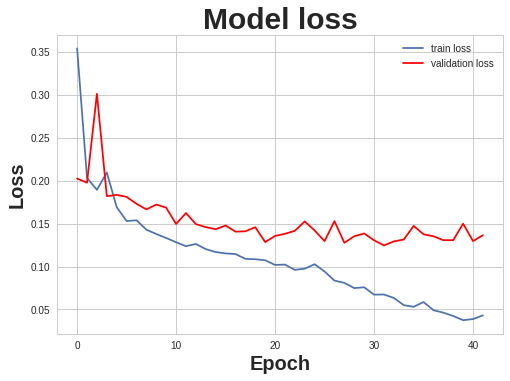

<Figure size 1152x648 with 0 Axes>

In [119]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=30,fontweight='bold')
plt.ylabel('Loss',size=20,fontweight='semibold')
plt.xlabel('Epoch',size=20,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [120]:
# Check the model summary
Trained_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 150)           93600     
_________________________________________________________________
dropout_8 (Dropout)          (None, 30, 150)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 194,101
Trainable params: 194,101
Non-trainable params: 0
_________________________________________________________________


In [121]:
# predictions for LSTM

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.44764712]]


In [122]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(866, 1)


In [123]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[1224.4863]
(866, 1)
866


In [124]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(866).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.81913618]
KGE' is : [0.81502284]
r is : [0.94182391], gamma is : [0.93788457]
KGE is : [0.72236832]
alpha is : [0.7838493], beta is : [0.83576308]
PBIAS is : [16.42369232]
RMSE is : 333.1744106294659
MARE is : [0.24232979]
MSE is : 111005.18789829197
MAE is : 239.5319434612177
MAPE is : 37.964882661731345
R2 is : 0.8191361825440948



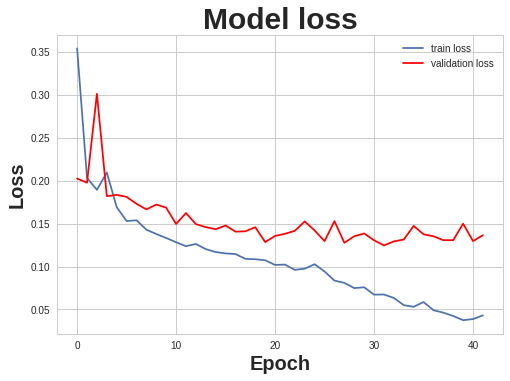

<Figure size 1152x648 with 0 Axes>

In [125]:
# Plot the actual versus predicted values.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=30,fontweight='bold')
plt.ylabel('Loss',size=20,fontweight='semibold')
plt.xlabel('Epoch',size=20,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [126]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/niamey_models/LSTM_Multi_Niamey_Q_1step_30days_gpm_history.csv', index=False)

In [127]:
# 7th Model
# GRU Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [128]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [129]:
# # Define the GRU model

GRU_model = Sequential([
    GRU(100, input_shape=x_train_multi.shape[-2:],return_sequences=True),
    Dropout(0.2),
    GRU(units=50,return_sequences=False),
    Dropout(0.2),
    Dense(units=horizon),
])
GRU_model.compile(optimizer='adam', loss='mse')

In [130]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/niamey_models/GRU_Multi_Niamey_Q_1step_30days_gpm.h5'

In [131]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 100
EPOCHS = 150
history = GRU_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/150
100/100 [==============================] - 4s 20ms/step - loss: 0.6827 - val_loss: 0.2163
Epoch 2/150
100/100 [==============================] - 1s 12ms/step - loss: 0.2137 - val_loss: 0.2033
Epoch 3/150
100/100 [==============================] - 1s 12ms/step - loss: 0.1930 - val_loss: 0.1976
Epoch 4/150
100/100 [==============================] - 1s 12ms/step - loss: 0.1806 - val_loss: 0.1927
Epoch 5/150
100/100 [==============================] - 1s 12ms/step - loss: 0.1733 - val_loss: 0.2085
Epoch 6/150
100/100 [==============================] - 1s 12ms/step - loss: 0.1759 - val_loss: 0.3223
Epoch 7/150
100/100 [==============================] - 1s 12ms/step - loss: 0.2232 - val_loss: 0.2100
Epoch 8/150
100/100 [==============================] - 1s 12ms/step - loss: 0.1928 - val_loss: 0.1782
Epoch 9/150
100/100 [==============================] - 1s 12ms/step - loss: 0.1629 - val_loss: 0.1726
Epoch 10/150
100/100 [==============================] - 1s 12ms/step - loss: 0.153

In [132]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

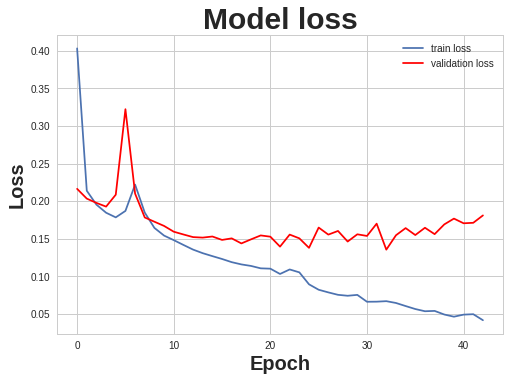

<Figure size 1152x648 with 0 Axes>

In [133]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=30,fontweight='bold')
plt.ylabel('Loss',size=20,fontweight='semibold')
plt.xlabel('Epoch',size=20,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [134]:
# Check the model summary
Trained_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 30, 100)           32100     
_________________________________________________________________
dropout_10 (Dropout)         (None, 30, 100)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 50)                22800     
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 54,951
Trainable params: 54,951
Non-trainable params: 0
_________________________________________________________________


In [135]:
# predictions for GRU

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.5227644]]


In [136]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(866, 1)


In [137]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[1272.6576]
(866, 1)
866


In [138]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(866).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.79367355]
KGE' is : [0.79114406]
r is : [0.92688667], gamma is : [0.86389527]
KGE is : [0.69765937]
alpha is : [0.74248582], beta is : [0.85946265]
PBIAS is : [14.0537353]
RMSE is : 355.85514213750747
MARE is : [0.26002196]
MSE is : 126632.88218570563
MAE is : 257.01984795656267
MAPE is : 56.97935358444299
R2 is : 0.7936735487666066



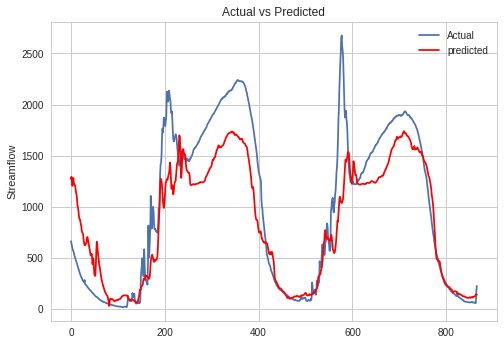

In [139]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q'].tail(866)))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()

In [140]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/niamey_models/GRU_Multi_Niamey_Q_1step_30days_gpm_history.csv', index=False)

In [141]:
# 8th Model Bidirectional LSTM

# import all libraries and modules
import tensorflow as tf
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
# import seaborn as sns   # for data visualisation
import matplotlib.pyplot as plt   # for plotting graph
%matplotlib inline 
# matplotlib inline ensures command in cells bellow the cell that outputs a plot does not affect the plot
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import warnings   # to ignore warnings
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn import set_config
import hydroeval as he

In [142]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [143]:
# Define the Bidirectional LSTM model

Bi_lstm_model = tf.keras.models.Sequential([
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150,
return_sequences=True), input_shape=x_train_multi.shape[-2:]),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
tf.keras.layers.Dense(20, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(units=horizon),
])
Bi_lstm_model.compile(optimizer='adam', loss='mse')

In [144]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/niamey_models/Bidirectional_LSTM_Multi_Niamey_Q_1step_30days_gpm.h5'

In [145]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 100
history = Bi_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/100
150/150 [==============================] - 11s 41ms/step - loss: 0.5028 - val_loss: 0.1953
Epoch 2/100
150/150 [==============================] - 5s 31ms/step - loss: 0.2575 - val_loss: 0.1707
Epoch 3/100
150/150 [==============================] - 5s 31ms/step - loss: 0.2055 - val_loss: 0.1320
Epoch 4/100
150/150 [==============================] - 5s 31ms/step - loss: 0.1886 - val_loss: 0.1490
Epoch 5/100
150/150 [==============================] - 5s 31ms/step - loss: 0.1852 - val_loss: 0.1252
Epoch 6/100
150/150 [==============================] - 5s 31ms/step - loss: 0.1736 - val_loss: 0.1415
Epoch 7/100
150/150 [==============================] - 5s 31ms/step - loss: 0.1705 - val_loss: 0.1641
Epoch 8/100
150/150 [==============================] - 5s 31ms/step - loss: 0.2006 - val_loss: 0.1379
Epoch 9/100
150/150 [==============================] - 5s 31ms/step - loss: 0.1637 - val_loss: 0.1190
Epoch 10/100
150/150 [==============================] - 5s 31ms/step - loss: 0.16

In [146]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

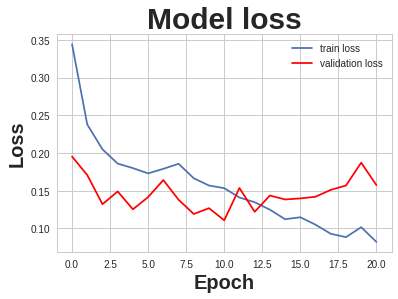

<Figure size 1152x648 with 0 Axes>

In [147]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=30,fontweight='bold')
plt.ylabel('Loss',size=20,fontweight='semibold')
plt.xlabel('Epoch',size=20,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [148]:
# Check the model summary
Trained_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 30, 300)           187200    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               140400    
_________________________________________________________________
dense_9 (Dense)              (None, 20)                2020      
_________________________________________________________________
dropout_12 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 329,641
Trainable params: 329,641
Non-trainable params: 0
_________________________________________________________________


In [149]:
predictions = []
for i in x_test_multi:
    # predict the hour
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.53848356]]


In [150]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(866, 1)


In [151]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[1282.7379]
(866, 1)


In [152]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(866).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.83524461]
KGE' is : [0.76970313]
r is : [0.949337], gamma is : [0.79581414]
KGE is : [0.70159676]
alpha is : [0.72125334], beta is : [0.90630877]
PBIAS is : [9.36912308]
RMSE is : 317.9915656427246
MARE is : [0.2472394]
MSE is : 101118.63581991123
MAE is : 244.38487160380942
MAPE is : 82.93031305691456
R2 is : 0.835244614809539



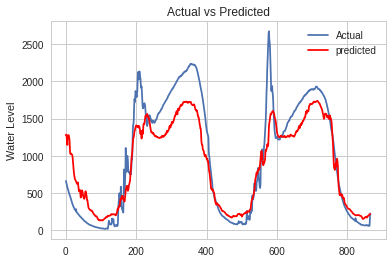

In [153]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q'].tail(866)))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Water Level")
plt.legend(('Actual','predicted'))
plt.show()

In [154]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/niamey_models/Bidirectional_LSTM_Multi_Niamey_Q_1step_30days_gpm_history.csv', index=False)